## Challenge 1

Le challenge consiste à déterminer l'énergie moyenne et la magnétisation moyenne en fonction de différentes valeurs du paramètre libre $\alpha=J/(k T)$ . Pour cela, nous allons d'abord, à partir d'un état dont les spins sont tous positifs (+1) générer des états avec des spins aléatoires en utilisant l’algorithme de Metropolis. Ensuite, nous allons générer 50 états, chacun possédant 50x50 spins, en utilisant la méthode d'Ising. 
L'énergie et magnétisation moyennes sont calculées grâce aux formules suivantes: 

\begin{align*}
&<E> = \frac{\sum_k E_k}{N_k} \\
&<M> = \frac{\sum_k M_k}{N_k}
\end{align*}

avec $N_k$ le nombre d'états générés pour un $\alpha$ donné.

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML
import random

In [2]:
nx=50
ny=50
sp = numpy.ones([nx,ny])
NMC = 50

In [3]:
#On calcule l'énergie de chaque site de notre état
def energy_at_site(sp,alpha,sigma,ix,iy):
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])
    return energy

On définit un algorithme qui change de signe le spin d'un site si la condition suivante est satisfaite:

$$
p_{\rm flip}=e^{-\Delta E},
$$

avec $\Delta E$ la différence entre l'énergie du site avant et après changement de spin.

In [4]:
def metropolis_at_site(sp,alpha,ix,iy):
    sigma=sp[ix,iy]  #Sigma est la valeur de spin à la position (ix,iy) de notre état
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy) #On calcule l'énergie du site
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy) #L'énergie change de signe
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):    #On change de spin si la condition est satisfaite
        sp[ix,iy]=-sp[ix,iy]
    return sp[ix,iy]

Nous utilisons maintenant le modèle d'Ising afin de générer un certain nombre d'états. Le spin de chaque état est modifié grâce à l’algorithme de Metropolis.

In [5]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    states = numpy.empty([NMC+1,nx,ny]) # On définit une liste de matrices nulles
    states[0] = sp.copy() #le premier élément de la liste est la matrice sp de départ
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx) #On définit ix comme un nombre aléatoire entre 0 et nx 
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy) #On modifie le spin du site (ix,iy) 
        states[i]=sp.copy() #On place le nouvel état obtenu dans notre liste de matrices
    return states

On est prêts à calculer l'énergie et magnétisation moyennes pour chaque valeur de $\alpha$.

In [6]:
def ising_model_mean_energy_mag(sp, NMC, nx, ny):
    stp = (1/NMC) #On définit le step avec lequel alpha évolue
    alpha=0
    alist=[]
    meanlist=[]
    maglist=[]
    for l in range(0,NMC):
        b=[]
        alpha=alpha + stp #On modifie alpha
        matrixlist = ising_model_metropolis(sp, NMC, nx, ny, alpha) #On génère une série d'états pour un alpha donné
        a = matrixlist.sum(axis=(1,2)) #On  somme tous les éléments de chaque matrice dans la liste
        a = numpy.delete(a,0) #On enlève le premier élément qui correspond à la matrice sp dont tout les spins sont inchangés
        matrixlist = numpy.array(matrixlist)
        for i in range(1,NMC+1):
            for j in range(0,ny):
                for k in range(0,nx):
                    sigma=matrixlist[i,j,k] #Sigma est la valeur de spin à un site donné
                    eas = energy_at_site(matrixlist[i],alpha,sigma,j,k) #On calcule l'énergie de chaque site
                    b=numpy.append(b,eas) #On stocke l'énergie dans une liste
                    k=k+1
                j=j+1
            i=i+1
            b = numpy.array(b) #On somme les énergies
        mag=(numpy.sum(a))/NMC #On calcule la magnétisation moyenne
        mean = numpy.sum(b)/NMC #On calcule l'énergie moyenne
        meanlist.append(mean)
        maglist.append(mag)
        l=l+1
        alist.append(alpha)
    return alist, meanlist, maglist

In [7]:
a, b, c = ising_model_mean_energy_mag(sp, NMC, nx, ny)

Le graphe obtenu pour l'énergie moyenne est le suivant:

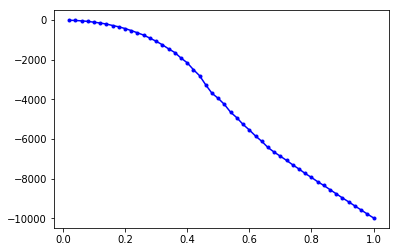

In [8]:
pyplot.plot(a,b,'-b.')

Pour la magnétisation, nous obtenons:

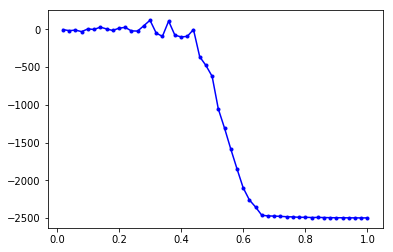

In [9]:
pyplot.plot(a,c,'-b.')

La solution exacte d'Onsager pour un modèle d'Ising à 2 dimensions prédit que [1] :

$$
\frac{kT_c}{J}=2.269185 \Rightarrow \alpha = \frac{J}{kT_c} = 0.44  
$$

Nous observons en effet sur les deux graphiques ci-dessus que la transition de phase à lieu autour de cette valeur de $\alpha$.

## Challenge 2

Nous générons ensuite une autre condition initiale en choisissant des valeurs de spin aléatoires pour chaque site, comme défini ci-dessous :

In [10]:
def initial_state(nx,ny):  
    r = numpy.random.randint(0,2,(nx,ny))
    r[r==0] =-1

    return r

In [11]:
a, d, e = ising_model_mean_energy_mag(initial_state(nx,ny), NMC, nx, ny)

Pour l'énergie moyenne, on obtient:

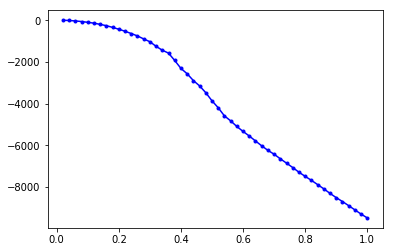

In [12]:
pyplot.plot(a,d,'-b.')

Pour la magnétisation, on obtient:

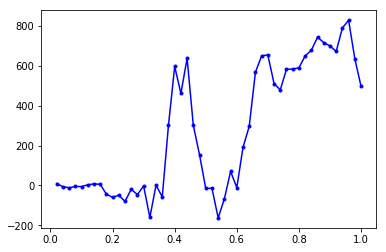

In [13]:
pyplot.plot(a,e,'-b.')

Nous observons que pour une condition initiale différente, les transitions de phase ont lieu à la même valeur de $\alpha$.

Références:

[1]  https://homepages.warwick.ac.uk/~masdbn/9511003.pdf?fbclid=IwAR3s_4HpC_uhWlSXak05CrGl_EI7Nqv-fgUWkfLITozCAi1LFHD9Ttd9B-M